In [14]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))  # Adjust if your notebook is nested deeper

from src.data_preprocessing import load_data, preprocess_data
data = load_data('../data/raw/MachineLearningRating_v3.txt')


In [21]:
data.shape

(1000098, 52)

In [26]:
data.columns.values

array(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country',
       'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone',
       'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make',
       'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype',
       'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder',
       'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'], dtype=object)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1


Correlation Matrix (numeric features only):
                          UnderwrittenCoverID  PolicyID  IsVATRegistered  \
UnderwrittenCoverID                  1.000000  0.916324         0.020838   
PolicyID                             0.916324  1.000000         0.033661   
IsVATRegistered                      0.020838  0.033661         1.000000   
PostalCode                          -0.018206 -0.034186        -0.037956   
mmcode                               0.083310  0.074428        -0.205454   
RegistrationYear                     0.065886  0.067192        -0.010396   
Cylinders                           -0.026910 -0.028551         0.033334   
cubiccapacity                        0.084892  0.088083        -0.047206   
kilowatts                           -0.038613 -0.032198        -0.044592   
NumberOfDoors                       -0.023781 -0.031438         0.013665   
CustomValueEstimate                  0.006728  0.005268        -0.005452   
NumberOfVehiclesInFleet                   N

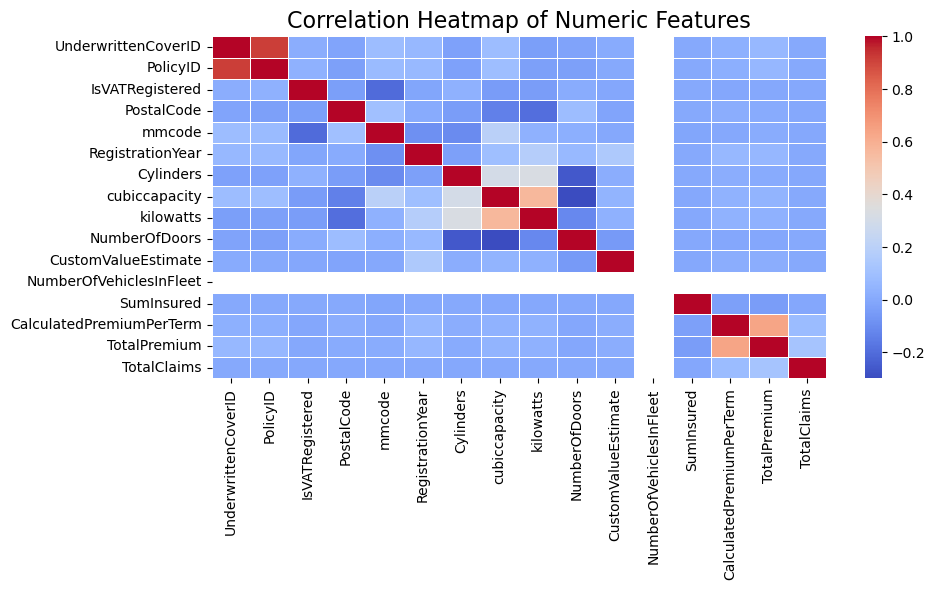

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix (numeric columns only)
correlation_matrix = data.corr(numeric_only=True)

# Step 2: Display the correlation matrix in numbers
print("\nCorrelation Matrix (numeric features only):")
print(correlation_matrix)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


In [38]:
from src.data_preprocessing import load_data, preprocess_data
from src.exploratory_data_analysis import compute_loss_ratio,plot_loss_ratio_by,univariate_analysis, outlier_detection,temporal_trend,vehicle_claims_analysis,correlation_analysis


ModuleNotFoundError: No module named 'data_preprocessing'

In [34]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')